The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this notebook you'll work through the end to end machine learning pipeline and score in the top 1% of all participants in the Kaggle competition. 

Kaggle is a site that hosts competitive modeling competitions. In the applied space, a score in the top 5% of this competition is considered a resume worthy bullet point. 


In [1]:
# Import the libraries you'll need for this project
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

**XGBoost** is an open source machine learning library that belongs to a class of models called gradient boosters. XGBoost is a supervised machine learning algorithm.  Supervised learning models use existing data to look for patterns.  Two of the most common approaches used when building supervised learning models are classification and regression. XGBoost excels at building highly accurate classification and regression models very quickly.  This means that XGBoost is a top choice for building real world models against highly structured datasets. XGBoost has also become the gold standard for competitive modeling. 

> XGBoost has won almost every competition using structured datasets on Kaggle and other competitive modeling competitions.


In [2]:
# Create a variable called data to hold the titanic dataset
data = pd.read_csv("data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Dictionary**


- [survived] Survival 0 = No, 1 = Yes (This is the target variable)
- [pclass] Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- [sex] Sex 
- [Age] Age in years 
- [sibsp] # of siblings / spouses aboard the Titanic 
- [parch] # of parents / children aboard the Titanic 
- [ticket] Ticket number 
- [fare] Passenger fare 
- [cabin] Cabin number 
- [embarked] Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton



In the next cell let's view the percentage of those who died versus those who survived. 

/Users/rob/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


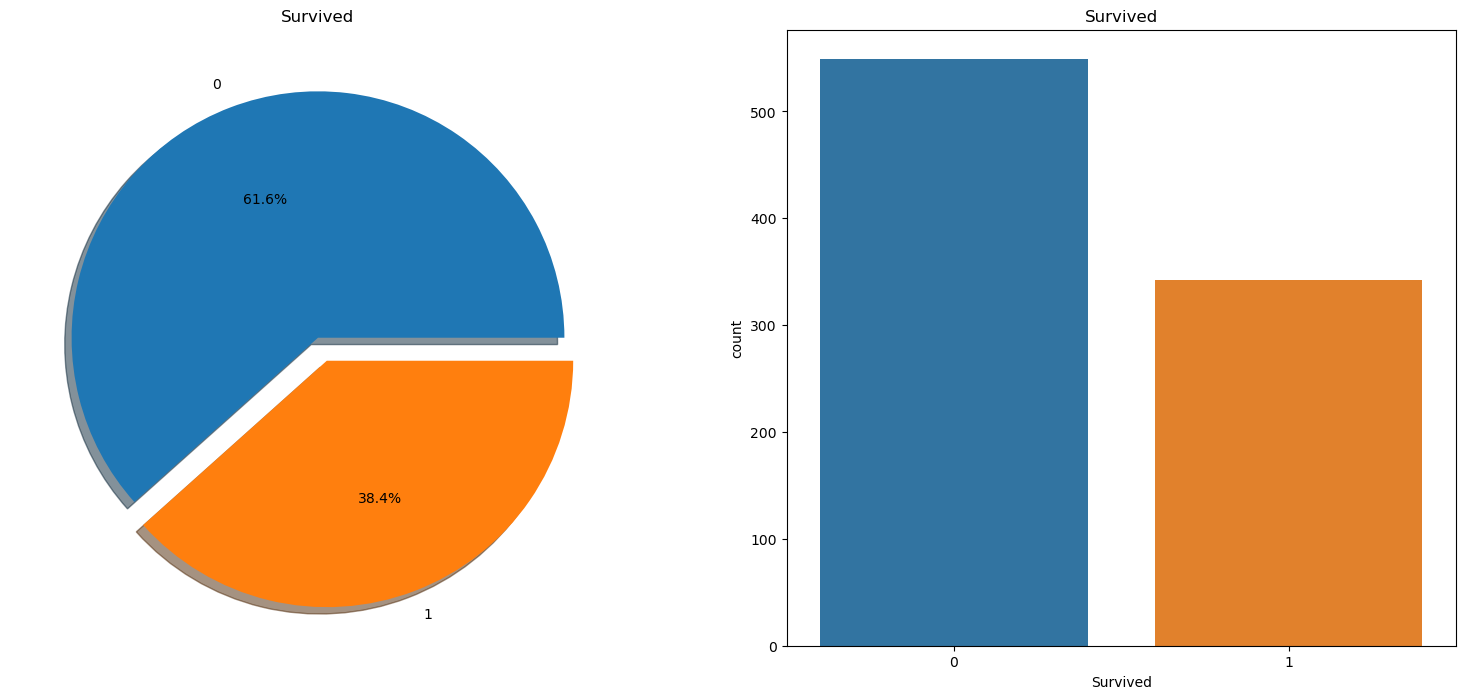

In [3]:
# import the libraries I need for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot survived vs dies
f, ax = plt.subplots(1, 2, figsize=(19, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()


Not many survived this tradgedy. Out of 891 passengers in training set, only around 350 survived. 

> Only **38.4%** of the total training set survived the crash.  

Let’s craft a graph to view the survivors based on their genders. Spoiler alert. The men didn’t too well. 

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


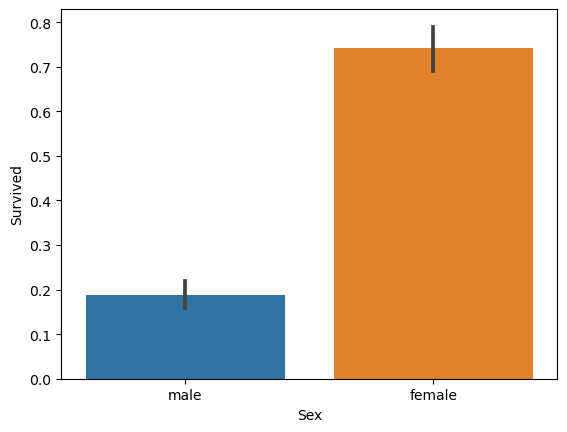

In [4]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=data)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [5]:
# Create a variable called data to hold only the attributes we want. 
data = data [['Survived', 'Pclass', 'Sex','Age','SibSp','Parch']]

In [6]:
# After I view the dataset the only non-numeric attribute is sex
data.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [21]:
# Use label encoding to covert sex to numbers
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data.loc[:,'Sex'] = label_encoder.fit_transform(data['Sex']) 

/var/folders/6s/k7rt0_9s6116fpzzx9k6kz3c0000gn/T/ipykernel_33586/1154941613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Sex'] = label_encoder.fit_transform(data['Sex'])


In [22]:
# Analyze how many null values are in the dataset
data.isnull().sum()

Survived      1
Pclass        1
Sex           0
Age         178
SibSp         1
Parch         1
dtype: int64

In the code below I've chosen to drop all the NAN values instead of replacing them. 

> I did use mean value imputation, however, the model's performance was not as good as just dropping them. 

In [23]:
# Dropping all the NANs in the age attribute
data.dropna(subset=['Age'], how='all', inplace = True)

/var/folders/6s/k7rt0_9s6116fpzzx9k6kz3c0000gn/T/ipykernel_33586/4027155263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Age'], how='all', inplace = True)


In [24]:
# Defining X and Y. 
X = data.drop('Survived', axis=1)
# The target variable is Survived. 
y = data['Survived']

In the code below I'm using train/test/split to create training and testing sets. The random_state parameter is used for reproducability. 

In [25]:
# Separate the data into disparate training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Define the classifier. All models in SciKit-Learn are called classifiers. 
# I'm using the SciKit-Learn implementation of XGBoost on this project.
model = XGBClassifier(max_depth=4,n_estimators=50)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
# Let's create a variable to hold our prediction against test dataset and make predictions.
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [28]:
# Importing metrics and using accuracy as the metric for this project
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.36%
